# Rain Prediction model

The objective is to create machine learning models encompassing data exploration, visualization, model training, and evaluation.The project also aims to build an accurate predictive model for rainfall based on diverse features given in the dataset.

## Importing the necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



Importing necessary libraries for data manipulation, visualization, and machine learning. These include Pandas for data handling, NumPy for numerical operations, Seaborn and Matplotlib for visualization, and various regression algorithms from scikit-learn. GridSearchCV is imported for hyperparameter tuning

## Data Exploration

#### Loading the Datasets

I first dowloaded the given excel files and uploaded that in my folder where this Jupyter Notebook is present.I'll be reading the excel file ("sydney_rain prediction.xlsx") into Pandas DataFrames: df for the main dataset.

In [2]:
df = pd.read_excel("sydney_rain prediction.xlsx")

let's see how our dataset looks

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


Let's find the number of rows, and the number of columns in the DataFrame.

In [4]:
df.shape

(3337, 17)

It shows that the DataFrame has '3337' rows and '17' columns.

## Feature Engineering

The "Location" column was dropped as it contained only one unique value, offering no variability or meaningful information for predictive modeling, making it irrelevant for the analysis.

In [5]:
if 'Location' in df.columns:
    df = df.drop(['Location'], axis=1)


Let's drop duplicate values. If there are identical rows in the dataset, this operation retains only the first occurrence of each unique row and discards subsequent duplicates. It helps ensure the DataFrame contains only distinct rows, potentially improving the integrity of the data for analysis or modeling.

In [9]:
df = df.drop_duplicates()

Let's Display a concise summary of the information about the DataFrame df. It provides details such as the number of non-null entries, data types, and memory usage for each column. This helps in understanding the structure and completeness of the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3334 non-null   float64       
 2   MaxTemp       3335 non-null   float64       
 3   Rainfall      3331 non-null   float64       
 4   Evaporation   3286 non-null   float64       
 5   Sunshine      3321 non-null   float64       
 6   Humidity9am   3323 non-null   float64       
 7   Humidity3pm   3324 non-null   float64       
 8   Pressure9am   3317 non-null   float64       
 9   Pressure3pm   3318 non-null   float64       
 10  Cloud9am      2771 non-null   float64       
 11  Cloud3pm      2776 non-null   float64       
 12  Temp9am       3333 non-null   float64       
 13  Temp3pm       3333 non-null   float64       
 14  RainToday     3331 non-null   object        
 15  RainTomorrow  3337 non-null   object  

The count for all the columns is not same.So we'll count the number of missing values (NaN) in each column of the DataFrame df

In [8]:
df.isnull().sum()

Date              0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

This shows that many columns have missing values.

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


We have observed a large number of missing values. Since the number of missing records is high, deleting the records might result in loss of valuable information.Therefore we will be using forwardfill to fill missing values in the DataFrame df.This means that each missing value is replaced with the most recent non-missing value in the same column.Assuming the dataset has a temporal order, using forward-fill helps maintain the sequential structure of the data .

In [13]:
df= df.fillna(df.fillna(method='ffill'))

Now Let's see if still there are any missing values left

In [14]:
print(df.isnull().sum())

Date            0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


Hence, we have filled all the missing values.

In [14]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,2.2,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


First, we need to convert categorical variables to binary variables. We will use pandas get_dummies() method for this.

In [15]:
df = pd.get_dummies(df, columns=['RainToday'])

In [16]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,0,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,0,1
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,0,1
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,0,1
4,2008-02-05,19.7,25.7,77.4,2.2,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,0,1


Let's transform the original date information into numerical features that can be utilized by machine learning models for better understanding and prediction.We will be creating new Columns 'Year', 'Day', Month'. Also we'll be dropping the origial Date Column.

In [17]:
# First Converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Droping the original date column
df = df.drop(['Date'], axis=1)

Now, let's see how our dataFrame looks like.

In [18]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes,Year,Month,Day
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,0,1,2008,2,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,0,1,2008,2,2
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,0,1,2008,2,3
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,0,1,2008,2,4
4,19.7,25.7,77.4,2.2,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,0,1,2008,2,5


Now we'll replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the get_dummies method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target. Since, now only 'RainTomorrow' is object type, it is easy to replace 'No' with 0, and 'Yes' with 1.

In [19]:
df.replace(['No', 'Yes'], [0,1], inplace=True)

Let's see how this column looks 

In [20]:
df[['RainTomorrow']]

,RainTomorrow
0,1
1,1
2,1
3,1
4,1
...,...
3332,0
3333,0
3334,0
3335,0


<AxesSubplot: >

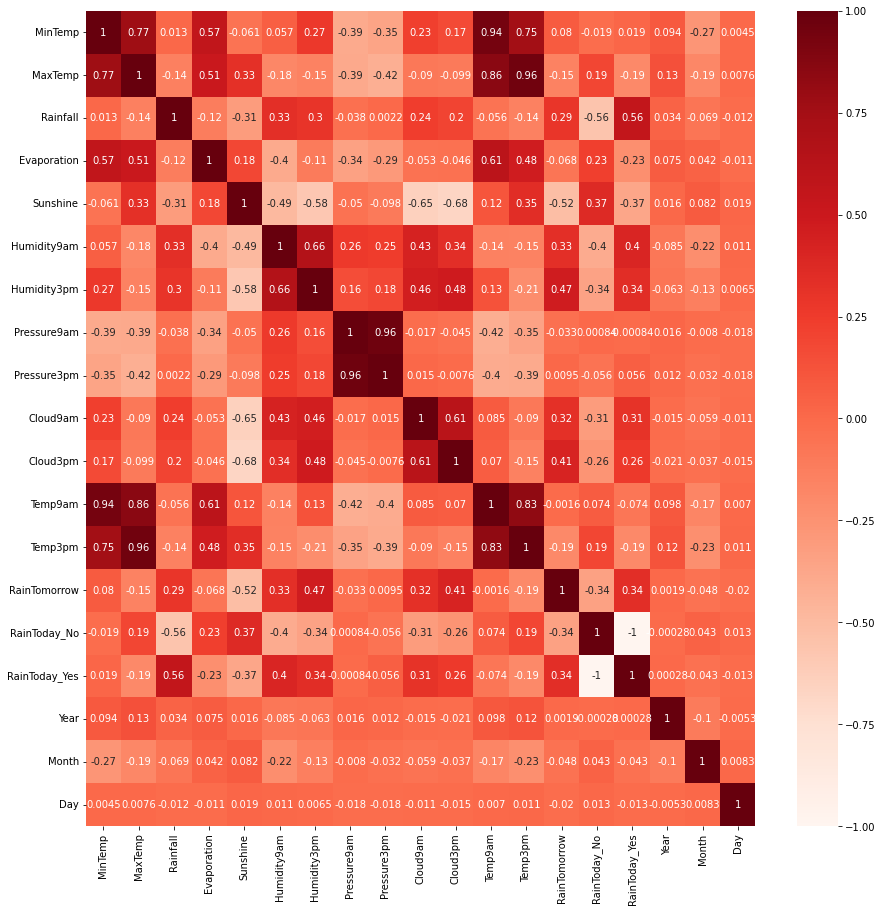

In [21]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),  cmap='Reds',annot=True)

In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes,Year,Month,Day
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.866497,23.006173,3.326820,5.172460,7.180911,68.172011,54.704525,1018.368445,1016.045967,4.482469,4.352113,17.822295,21.534252,0.259215,0.740186,0.259814,2012.300869,6.413545,15.705424
std,4.552422,4.496019,9.887531,2.770498,3.812163,15.104783,16.291748,7.023022,7.039433,2.607820,2.437914,4.896793,4.302129,0.438269,0.438598,0.438598,2.761933,3.397846,8.795802
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,6.000000,5.000000,18.200000,21.300000,0.000000,1.000000,0.000000,2012.000000,6.000000,16.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.200000,1020.900000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000,1.000000,2015.000000,9.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000


Now, let's divide the features(x) and the target variable(y).This allows for a clear distinction between the features used for prediction and the target variable being predicted.

In [23]:
# Creating features (X) and target variable (y)

x = df.drop(columns='RainTomorrow', axis=1)
y = df['RainTomorrow']

x represents the independent variables or features. It is obtained by dropping the column labeled "RainTomorrow" along the columns (axis=1) from the DataFrame df. Therefore, x contains all the columns in df except the "RainTomorrow" column.

y represents the dependent variable or the target variable. It is assigned the values in the "RainTomorrow" column of the DataFrame df. This is the variable we want to predict.


## Data Splitting

Here,we are splitting the dataset (x for features and y for the target variable) into training and testing sets using the train_test_split function. The split is done with a test size of 20%, and a random state is set for reproducibility. This step is crucial for evaluating the model's performance on unseen data.

In [34]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Let's quicky check the dimensions of the data after the train-test split.

In [27]:
#Displaying the shape of the training and test data

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 18) (668, 18) (2669,) (668,)


## Model Training

Let's initializes and fit several classification models of LogisticRegression(LR)), K-Nearest Neighbors Classifier(KNN), AdaBoost Classifier(ada),Decision Tree Classifier (dt), Random Forest Classifier (rf). Each model is trained on the training data (X_train and y_train).

In [32]:
#fitting the KNN Classifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
accuracy_knn= accuracy_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Printing the accuracy score and confusion matrix for the KNN (K-Nearest Neighbour)
print('KNN Accuracy Score: ', accuracy_knn)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_knn)

KNN Accuracy Score:  0.7904191616766467
Confusion Matrix for Decision Tree:
[[429  55]
 [ 85  99]]


In [33]:
#fitting the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Printing the accuracy score and confusion matrix for the Decision Tree Classifier
print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

Decision Tree Accuracy: 0.7994011976047904
Confusion Matrix for Decision Tree:
[[427  57]
 [ 77 107]]


In [35]:
#fitting the Logistic Regression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Printing the accuracy score and confusion matrix for the Logistic Regression
print("Logistic Regression Accuracy:", accuracy_lr)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_lr)

Logistic Regression Accuracy: 0.8173652694610778
Confusion Matrix for Decision Tree:
[[445  39]
 [ 83 101]]


In [43]:
# Bagging with Decision Tree
bagging_classifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=42),
                                       n_estimators=500, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Printing the accuracy score and confusion matrix for the Bagging with Decision Tree
print("\nBagging Accuracy:", accuracy_bagging)
print("Confusion Matrix for Bagging:")
print(conf_matrix_bagging)


Bagging Accuracy: 0.8263473053892215
Confusion Matrix for Bagging:
[[447  37]
 [ 79 105]]


In [37]:
# Boosting with Decision Tree (AdaBoost)
adaboost_classifier = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=42),
                                         n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Printing the accuracy score and confusion matrix for the Adaboost
print("\nAdaBoost Accuracy:", accuracy_adaboost)
print("Confusion Matrix for AdaBoost:")
print(conf_matrix_adaboost)


AdaBoost Accuracy: 0.7619760479041916
Confusion Matrix for AdaBoost:
[[403  81]
 [ 78 106]]


In [52]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Printing the accuracy score and confusion matrix for the RandomForest Classifier
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Random Forest Accuracy: 0.8323353293413174
Confusion Matrix for Random Forest:
[[453  31]
 [ 81 103]]


In [72]:
#Gradient Boosting Classifier model 
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the accuracy score and confusion matrix for the Gradient Boosting Classifier
print('Gradient Boosting Classifier Accuracy:', accuracy)
print('Confusion Matrix:')
print(conf_matrix)

Gradient Boosting Classifier Accuracy: 0.8248502994011976
Confusion Matrix:
[[438  46]
 [ 71 113]]


## Model Evaluation

Now, I'll be creating a Pandas DataFrame named Report that summarizes the accuracy scores of various classification algorithms.

In [73]:
Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree',  'LogisticRegression','bagging_classifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'],
          'Accuracy Score': [accuracy_knn, accuracy_dt, accuracy_lr, accuracy_bagging, accuracy_adaboost, accuracy_rf, accuracy_gbm]}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score
0,"KNN, K=4",0.790419
1,Decision Tree,0.799401
2,LogisticRegression,0.817365
3,bagging_classifier,0.826347
4,AdaBoostClassifier,0.761976
5,RandomForestClassifier,0.832335
6,GradientBoostingClassifier,0.824850


Random Forest Accuracy has the highest Accuracy score i.e 83.23%
This is the proportion of correctly predicted instances out of the total instances.

True Negatives (TN): 453 instances were correctly predicted as not raining.
False Positives (FP): 31 instances were predicted as raining when they were not.
False Negatives (FN): 81 instances were predicted as not raining when they were.
True Positives (TP): 103 instances were correctly predicted as raining.
These metrics provide a detailed understanding of the model's performance, especially in terms of correctly identifying instances with and without rainfall.


An "importance" value is given to each feature. These values can be used to interpret the results given.

In [53]:
rf_classifier.feature_importances_

array([0.04751461, 0.05207519, 0.06481856, 0.04430157, 0.15681119,
       0.06147249, 0.1598472 , 0.04875563, 0.04902791, 0.03026279,
       0.05780975, 0.04497055, 0.0556157 , 0.01462822, 0.01339158,
       0.02871248, 0.02792862, 0.04205597])

Let's turn this into a dataframe and visualize the most important features.

In [55]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

In [57]:
importance_df

,feature,importance
6,Humidity3pm,0.159847
4,Sunshine,0.156811
2,Rainfall,0.064819
5,Humidity9am,0.061472
10,Cloud3pm,0.057810
12,Temp3pm,0.055616
1,MaxTemp,0.052075
8,Pressure3pm,0.049028
7,Pressure9am,0.048756
0,MinTemp,0.047515


Now lets see which feature is given the most importance.

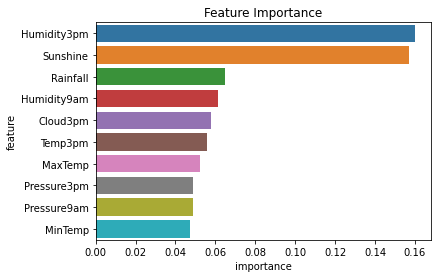

In [58]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Questions

#### 1. Your views about the problem statement?

This is a Classification Problem where we are tasked with constructing machine learning model to predict rainfall based on meteorological features. The objective is to build a model using various classification models that can predict rainfall. The dataset includes various weather-related parameters such as temperature, humidity, and pressure.The use of different classification algorithms, such as K-Nearest Neighbors, Decision Tree, Logistic Regression, Bagging, AdaBoost, and Random Forest, along with hyperparameter tuning, showcases a comprehensive model selection process.  

#### 2. What will be your approach to solving this task?
1.To approach this task, I would begin by importing essential Python libraries such as pandas, numpy, scikit-learn, and matplotlib or seaborn for comprehensive data manipulation, analysis, and visualization. If necessary, I would install additional libraries. Following this, I'd load the dataset, assuming it's in an Excel (xlsx) file format, using the `read_excel` function from pandas to create a DataFrame. Subsequently, I'd conduct an initial exploration of the data using functions like `head()`, `info()`, and `describe()` to understand its structure, data types, and summary statistics.

2.After the initial exploration, I'd address potential duplicate values and handle missing data by either removing or imputing values based on the nature of the missing data. This step is crucial to ensure the dataset's cleanliness and suitability for modeling.

3.For feature engineering, I might derive additional features from the 'Date' column, such as year, month, and day, to capture temporal patterns. Additionally, I'd convert categorical variables into numerical format, potentially utilizing one-hot encoding. Specifically, for the 'RainToday' column, I'd use the `get_dummies` function for one-hot encoding. Furthermore, I'd convert the 'RainTomorrow' column into a binary format, indicating whether or not rain is predicted, to facilitate the modeling process

4.Following preprocessing, I'd split the dataset into training and testing sets using scikit-learn's `train_test_split` function. This step enables me to train the model on one subset and evaluate its performance on another, ensuring the model's ability to generalize to unseen data.

5.Moving on to model building, I would experiment with diverse classification algorithms such as K-Nearest Neighbors, Decision Tree, Logistic Regression, Bagging, AdaBoost, and Random Forest. Scikit-learn would be utilized to train these models on the training set.

6.Finally, I'd assess the models using various metrics, including accuracy, precision, recall, and F1-score. Based on the results, I'd select the best-performing model and conduct a detailed analysis of its predictions using confusion matrices.

7.Additionally, I would investigate the impact of different missing value imputation strategies, such as filling missing values with the median, forward fill (ffill), and backward fill (bfill). This iterative process allows me to discern which imputation strategy contributes to the superior performance of the models.

#### 3. What were the available ML model options you had to perform this task?

For this task, I had several machine learning models to choose from. These included K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression, Bagging Classifier, AdaBoost Classifier, and Random Forest Classifier. Each of these models has its own strengths and weaknesses, and the goal was to try different models and determine which one performs the best for predicting rainfall based on the given dataset.

#### 4. Which model’s performance is best and what could be the possible reason for that?

The Random Forest model showed the best performance among all the models. One possible reason for this could be that Random Forest is good at handling complex relationships in the data and tends to perform well in a variety of scenarios. It combines multiple decision trees, which individually might have limitations, but together they create a more robust and accurate prediction. This model is effective in capturing patterns in the data and making reliable predictions about whether it will rain or not.

#### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the effectiveness of the selected Random Forest model, we can take the following measures:

1. **Handling Missing Values with SimpleImputer:**
   - Implement SimpleImputer to deal with any remaining missing values in the dataset, guaranteeing that all data points are considered during model training.

2. **Scaling Numeric Features using MinMaxScaler:**
   - Employ MinMaxScaler to normalize numeric features. This is particularly crucial for Random Forest, especially when features have varying scales. Normalizing ensures that all features have an equal contribution to the model.

3. **Exploring Feature Importance:**
   - Investigate the feature importance as indicated by the trained Random Forest model. Identify and prioritize the most impactful features. This understanding can guide decisions on feature selection or engineering, potentially enhancing model accuracy.

4. **Further Hyperparameter Tuning:**
   - Delve deeper into hyperparameter tuning, specifically adjusting parameters like max_features, min_samples_split, min_samples_leaf, bootstrap, and max_samples. Fine-tuning these parameters can significantly influence the model's overall performance.

5. **Making Predictions on New Dataset:**
   - Assess the model's performance on entirely new or unseen data. This evaluation ensures that the model generalizes effectively and is not excessively tailored to the training data.

By methodically implementing these strategies, we can refine the Random Forest model, tapping into its full potential for accurate rainfall prediction. Each of these approaches addresses specific facets of model enhancement, collectively contributing to an improved predictive capability.